In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Torch 
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchmetrics import Accuracy

# Scikit-Learn
from sklearn.model_selection import train_test_split
# Data Encoding and Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Natural Language Processing(NLP)
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# # Word Embedding
import gensim
from gensim.models import Word2Vec

In [2]:
nltk.download('punkt')      # For tokenization
nltk.download('stopwords')  # For stopword removal

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dushyant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dushyant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [4]:
df = pd.read_csv('IntervieweeDataset.csv')

In [5]:
df['Type of Graduation/Post Graduation'].unique()

array(['Masters in data science', 'BSc or MSc', 'B.E / B-Tech', 'BA/MA',
       'B.ed(Teaching)', 'M.E / M-Tech', 'B.com (Bachelor of commerce)',
       'MED', 'M.com', 'MBA', 'BCA/MCA',
       'B.comm (Bachelor of mass comm.)', 'BBA or BBM',
       'Hotel Management', 'PG diploma ', 'B.pharma/M.pharma', 'PGDM',
       'Bachelor in dental', 'Undergrad (12th pass)', 'pgdm',
       'Pursuing regular MBA ', 'masters in social ',
       'MCOM , B.ED REGULAR', 'Bachelor in medical lab', 'Pgdm',
       'master maas comm', 'BE - CSe and CDAC ', 'phd', 'master 2019',
       'LLB', 'Bachelors in fisheries in science', 'LLM', 'PHD ', 'BMS',
       'B-pharma', 'pg(eco)', 'bachlors in journalism-2021',
       'msw-hr-2014', 'MS', 'bachelors in hospitality management-2021 ',
       'Mphil', 'b.com and pgdc , ', 'bachelor mass communication',
       'PG(Bachelor of Library Science)', 'MMC', 'MASTER IN MANGEMENT ',
       'pgdm ', 'Persuing masters', 'M Phil', 'MCA', 'NISM PGPSM',
       'Diploma', '

In [6]:
df.head(1)

,Name,Age,Gender,Type of Graduation/Post Graduation,Marital status,Mode of interview given by candidate?,Pre Interview Check,Fluency in English based on introduction,Confidence based on Introduction (English),Confidence based on the topic given,...,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score,Whether joined the company or not\n
0,parida,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,3,2,1,1.0,1.0,11,7,3,42,No


In [7]:
df.dropna(inplace=True)

In [8]:
df.drop(df.iloc[:,8:18], axis=1, inplace=True)

In [9]:
df.drop(['Does the candidate has mother tongue influence while speaking english.', 'How many slides candidate have submitted in PPT?'], axis=1, inplace=True)

In [10]:
df.shape

(18681, 40)

In [11]:
df.rename(columns={'Whether joined the company or not\n': 'Whether joined the company or not', 'What was the type of Role?\t': 'What was the type of Role?'}, inplace=True)

In [12]:
categorical_cols = ['Gender', 'Type of Graduation/Post Graduation', 'Marital status', 'Mode of interview given by candidate?', 'Has acquaintance in Company and has spoken to him/her before applying?']
numerical_cols = ['Confidence Score', 'Structured Thinking Score', 'Regional Fluency Score', 'Total Score']
text_col = ['Comments']
target_col = 'Whether joined the company or not'

In [13]:
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))

In [14]:
df[target_col].unique()

array(['No', 'Yes', 'Not Joined', 'Joined'], dtype=object)

In [15]:
df[target_col] = df[target_col].replace({'Joined':'Yes', 'Not Joined':'No'})

In [16]:
df[target_col].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df[target_col] = df[target_col].map({'Yes': 1, 'No': 0}).astype(int)

In [18]:
df.head(4)

,Name,Age,Gender,Type of Graduation/Post Graduation,Marital status,Mode of interview given by candidate?,Pre Interview Check,Fluency in English based on introduction,Has acquaintance in Company and has spoken to him/her before applying?,Candidate Status,...,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score,Whether joined the company or not
0,parida,25,0,134,2,1,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,0,Experienced in non client facing(equal to or m...,...,3,2,1,1.0,1.0,11,7,3,42,0
1,shreej,29,0,60,2,1,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,0,Lateral(2021 and before with (less than 6 mont...,...,3,3,3,3.0,3.0,12,9,9,60,0
2,ms6744,27,0,13,2,1,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,1,Fresher(only 2022 grad),...,3,3,3,1.0,3.0,10,9,7,52,1
3,aswalu,22,1,13,2,0,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,0,Fresher(only 2022 grad),...,3,3,3,3.0,3.0,12,9,9,60,1


In [19]:
scaler = StandardScaler()
scaler

StandardScaler()

In [20]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [21]:
df.head(4)

,Name,Age,Gender,Type of Graduation/Post Graduation,Marital status,Mode of interview given by candidate?,Pre Interview Check,Fluency in English based on introduction,Has acquaintance in Company and has spoken to him/her before applying?,Candidate Status,...,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score,Whether joined the company or not
0,parida,25,0,134,2,1,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,0,Experienced in non client facing(equal to or m...,...,3,2,1,1.0,1.0,0.951490,-0.022276,-1.320677,-0.198863,0
1,shreej,29,0,60,2,1,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,0,Lateral(2021 and before with (less than 6 mont...,...,3,3,3,3.0,3.0,1.415087,1.256178,1.264403,1.509342,0
2,ms6744,27,0,13,2,1,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,1,Fresher(only 2022 grad),...,3,3,3,1.0,3.0,0.487893,1.256178,0.402709,0.750139,1
3,aswalu,22,1,13,2,0,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,0,Fresher(only 2022 grad),...,3,3,3,3.0,3.0,1.415087,1.256178,1.264403,1.509342,1


In [22]:
# Preprocessing Text(Stopwords and Stemming)
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [23]:
def formatting(text):
    words = word_tokenize(str(text).lower())
    words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return words

In [24]:
df['Comments'] = df['Comments'].apply(formatting)

In [25]:
# Train Word2Vec Model
w2v_model = Word2Vec(sentences=df['Comments'], vector_size=100, window=5, min_count=1, workers=4)
w2v_model

In [26]:
def get_text_embedding(text):
    words = formatting(text)
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

In [27]:
df['Comments'] = df['Comments'].apply(get_text_embedding)

In [28]:
df_embeddings = np.vstack(df['Comments'].values)

## Convert Data into Tensors

In [29]:
X_categorical = torch.tensor(df[categorical_cols].values, dtype=torch.long)
X_numerical = torch.tensor(df[numerical_cols].values, dtype=torch.float32)
X_text = torch.tensor(df_embeddings, dtype=torch.float32)
y = torch.tensor(df[target_col].values, dtype=torch.float32)

In [30]:
print(torch.unique(y))

tensor([0., 1.])


## Data Splitting

In [31]:
X_cat_train, X_cat_test, X_num_train, X_num_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_categorical, X_numerical, X_text, y, test_size=0.2, random_state=42
)

## Dataset

In [32]:
class CustomDataset(Dataset):
    def __init__(self, X_categorical, X_numerical, X_text, y):
        self.X_categorical = X_categorical
        self.X_numerical = X_numerical
        self.X_text = X_text
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X_categorical[idx], self.X_numerical[idx], self.X_text[idx], self.y[idx]

In [33]:
train_data = CustomDataset(X_cat_train, X_num_train, X_text_train, y_train)
test_data = CustomDataset(X_cat_test, X_num_test, X_text_test, y_test)

## DataLoader

In [34]:
workers = os.cpu_count()
workers

8

In [35]:
BATCH_SIZE = 16

In [36]:
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, num_workers=0, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, num_workers=0, shuffle=True)

In [37]:
train_data, len(train_data)

(<__main__.CustomDataset at 0x14ae5dae0f0>, 14944)

In [38]:
train_dataloader, len(train_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x14ae5dad100>, 934)

## Build a Neural Network

In [39]:
class HybridRecommender(nn.Module):
    def __init__(self, num_categorical, embedding_dim, num_numerical, text_embedding_dim):
        super().__init__()
        
        # Embedding layers for categorical features
        self.embeddings = nn.ModuleList([
            nn.Embedding(num_categories, embedding_dim) for num_categories in num_categorical
        ])

        ## Fully Connected Layers
        input_size = len(num_categorical) * embedding_dim + num_numerical + text_embedding_dim
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x_categorical, x_numerical, x_text):
        # Convert categorical indices into embeddings
        embeddings = [emb_layer(x_categorical[:, i]) for i, emb_layer in enumerate(self.embeddings)]
        x_categorical = torch.cat(embeddings, dim=1).float()
 
        # Concatenate all inputs (categorical embeddings, numerical features, text embeddings)
        x = torch.cat([x_categorical, x_numerical, x_text], dim=1)
        return self.network(x)

In [40]:
# Initialize Model
num_categorical = [len(label_encoders[col].classes_) for col in categorical_cols]
model_0 = HybridRecommender(num_categorical, embedding_dim=8, num_numerical=len(numerical_cols), text_embedding_dim=100)
model_0.to(device)

HybridRecommender(
  (embeddings): ModuleList(
    (0): Embedding(2, 8)
    (1): Embedding(224, 8)
    (2): Embedding(3, 8)
    (3-4): 2 x Embedding(2, 8)
  )
  (network): Sequential(
    (0): Linear(in_features=144, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [41]:
# Important Parameters
learning_rate = 0.001
epochs = 10

In [42]:
# Loss Function and Optimizer
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=learning_rate)

# Model Training and Testing Functions

In [43]:
def train_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_function:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy,
              device:torch.device):
    
    train_loss, train_acc = 0,0
    model.train()

    for X_cat, X_num, X_text, y in dataloader:
        X_cat, X_num, X_text, y = X_cat.to(device), X_num.to(device), X_text.to(device), y.to(device)
        
        # Forward Pass
        outputs = torch.sigmoid(model(X_cat, X_num, X_text).squeeze())
        y = y.float()
        
        # Calculate the loss and accuracy per batch
        loss = loss_function(outputs, y)
        train_loss += loss.item()
        preds = (outputs >= 0.5).float()
        train_acc += accuracy(preds,y)*100

        # Set gradients to zero
        optimizer.zero_grad()

        # Back Propogation
        loss.backward()

        # Update the Parameters
        optimizer.step()

    train_loss /= len(dataloader)  
    train_acc /= len(dataloader)  
        
    return train_loss, train_acc

In [44]:
def test_step(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_function:torch.nn.Module,
             accuracy,
             device:torch.device):

    test_loss, test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X_cat, X_num, X_text, y in dataloader:
            X_cat, X_num, X_text, y = X_cat.to(device), X_num.to(device), X_text.to(device), y.to(device)
            y = y.float()
            
            # Forward Pass
            outputs = torch.sigmoid(model(X_cat, X_num, X_text).squeeze())

            # Calculate the Loss and Accuracy per batch
            loss = loss_function(outputs, y)
            test_loss += loss.item()
            preds = (outputs >= 0.5).float()
            test_acc += accuracy(preds,y)*100

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    
        return test_loss, test_acc

# Combining Training and Testing Function into evaluate() method

In [45]:
def evaluate(model:torch.nn.Module,
            train_dataloader:torch.utils.data.DataLoader,
            test_dataloader:torch.utils.data.DataLoader,
            loss_function:torch.nn.Module,
            optimizer:torch.optim.Optimizer,
            accuracy,
            device:torch.device,
            epochs:int = 5):

    model.to(device)
    # Create empty result dictionary
    results = {'train_loss':[],
             'train_acc':[],
             'test_loss':[],
             'test_acc':[]}

    # Loop through training and testing steps for the number of epochs
    for epoch in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_function=loss_function,
                                          optimizer=optimizer,
                                          accuracy=accuracy,
                                          device=device)
        
        test_loss, test_acc = test_step(model=model,
                                          dataloader=test_dataloader,
                                          loss_function=loss_function,
                                          accuracy=accuracy,
                                          device=device)

        print(f'Training Loss: {train_loss:.5f} | Training Accuracy: {train_acc:.2f}% | Testing Loss: {test_loss:.5f} | Testing Accuracy: {test_acc:.2f}%')      

        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

    return results  

In [46]:
torch.manual_seed(42)
accuracy = Accuracy(task='binary').to(device)

model_0.to(device)

model_0_results = evaluate(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_function=loss_function,
                        optimizer=optimizer,
                        accuracy=accuracy,
                        device=device,
                        epochs=epochs)

Training Loss: 0.69429 | Training Accuracy: 47.64% | Testing Loss: 0.69318 | Testing Accuracy: 48.21%
Training Loss: 0.69312 | Training Accuracy: 47.64% | Testing Loss: 0.69295 | Testing Accuracy: 48.15%
Training Loss: 0.69296 | Training Accuracy: 47.64% | Testing Loss: 0.69271 | Testing Accuracy: 48.21%
Training Loss: 0.69271 | Training Accuracy: 47.64% | Testing Loss: 0.69283 | Testing Accuracy: 48.23%
Training Loss: 0.69276 | Training Accuracy: 47.64% | Testing Loss: 0.69274 | Testing Accuracy: 48.25%
Training Loss: 0.69243 | Training Accuracy: 47.64% | Testing Loss: 0.69299 | Testing Accuracy: 48.21%
Training Loss: 0.69262 | Training Accuracy: 47.64% | Testing Loss: 0.69280 | Testing Accuracy: 48.21%
Training Loss: 0.69260 | Training Accuracy: 47.64% | Testing Loss: 0.69279 | Testing Accuracy: 48.21%
Training Loss: 0.69242 | Training Accuracy: 47.64% | Testing Loss: 0.69296 | Testing Accuracy: 48.21%
Training Loss: 0.69248 | Training Accuracy: 47.64% | Testing Loss: 0.69379 | Testi

# Loss and Accuracy Curves

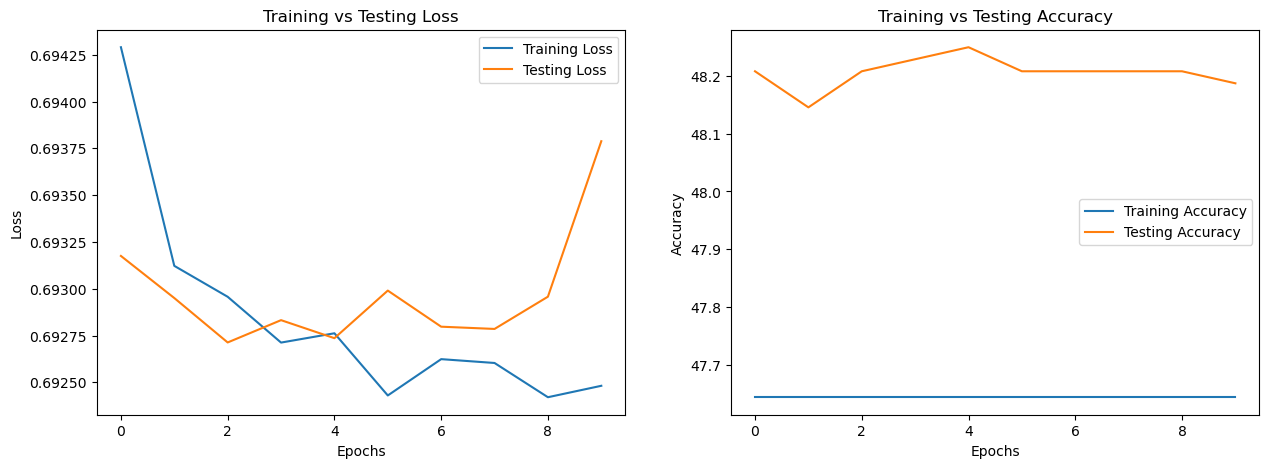

In [47]:
plt.figure(figsize=(15,5))
epochs = range(len(model_0_results['train_loss']))

plt.subplot(1,2,1)
plt.plot(epochs, model_0_results['train_loss'], label='Training Loss')
plt.plot(epochs, model_0_results['test_loss'], label='Testing Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Testing Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_0_results['train_acc'], label='Training Accuracy')
plt.plot(epochs, model_0_results['test_acc'], label='Testing Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()

plt.show()

In [48]:
# 🛠️ Step 1: Encode categorical variables safely
custom_cat = torch.tensor([
    label_encoders[col].transform([custom_data.get(col, "Unknown")])[0] 
    if col in label_encoders else 0  # Default category if missing
    for col in categorical_cols
], dtype=torch.long)

# 🔢 Step 2: Scale numerical features safely
custom_num_values = [custom_data.get(col, 0.0) for col in numerical_cols]
custom_num = torch.tensor(scaler.transform([custom_num_values]), dtype=torch.float32)

# 🔠 Step 3: Convert text to embeddings safely
custom_text_embedding = torch.tensor(
    get_text_embedding(custom_data.get('Comments', "")), dtype=torch.float32
)

# 📦 Step 4: Reshape for model input
custom_cat = custom_cat.unsqueeze(0)  # Add batch dimension
custom_num = custom_num.unsqueeze(0)
custom_text_embedding = custom_text_embedding.unsqueeze(0)

# 🔮 Step 5: Make Prediction
model_0.eval()
with torch.inference_mode():
    output = model_0(custom_cat.to(device), custom_num.to(device), custom_text_embedding.to(device))
    prediction = output.item()  # Get scalar value
    binary_prediction = 1 if prediction >= 0.5 else 0  # Convert probability to class

# 🏆 Step 6: Print the result
print(f"Model Output: {prediction:.4f}")
print(f"Predicted Class: {'Joined' if binary_prediction == 1 else 'Not Joined'}")


NameError: name 'custom_data' is not defined

In [ ]:
custom_data = {
    'Gender':'Male',
    'Type of Graduation/Post Graduation': 'BCA/MCA',
    'Marital status' : 'Unmarried',
    'Mode of interview given by candidate?': 'Laptop',
    'Confidence Score': 85.5,
    'Structured Thinking Score': 78.0,
    'Regional Fluency Score': 82.5,
    'Total Score': 80.0,
    'Comments': "Dushyant Goyal performed well with clear communication and structured thinking. He is very fluent in English and has done MCA during post-graduation",
    'Has acquaintance in Company and has spoken to him/her before applying?': 'No'
}

In [ ]:
# Step 1: Encode Categorical Data
custom_cat = torch.tensor([
    label_encoders[col].transform([custom_data.get(col, 'Unknown')])[0]
    if col in label_encoders else 0
    for col in categorical_cols
], dtype=torch.long)

# Step 2: Scale Numerical Features
custom_num_values = [custom_data.get(col, 0.0) for col in numerical_cols]
custom_num = torch.tensor(scaler.transform([custom_num_values]), dtype=torch.float32).squeeze(0)  # Fix extra dimension issue

# Step 3: Convert Text to Embeddings
custom_text_embedding = torch.tensor(
    get_text_embedding(custom_data.get('Comments', "")), dtype=torch.float32
)

# Ensure consistent dimensions
custom_cat = custom_cat.unsqueeze(0)  # Shape: [1, num_categorical_features]
custom_num = custom_num.unsqueeze(0)  # Shape: [1, num_numerical_features]
custom_text_embedding = custom_text_embedding.view(1, -1)  # Ensure it's [1, embedding_dim]

# Debug: Check Shapes
print(f"Shape of custom_cat: {custom_cat.shape}")
print(f"Shape of custom_num: {custom_num.shape}")
print(f"Shape of custom_text_embedding: {custom_text_embedding.shape}")

# Step 5: Make Prediction
model_0.eval()
with torch.inference_mode():
    output = model_0(custom_cat.to(device), custom_num.to(device), custom_text_embedding.to(device))
    prediction = output.item()  # Get scalar value
    binary_prediction = 1 if prediction >= 0.5 else 0  # Convert probability to class

# Step 6: Print the result
print(f"Model Output: {prediction:.4f}")
print(f"Predicted Class: {'Joined' if binary_prediction == 1 else 'Not Joined'}")